In [1]:
import ismdensgen as ism
reload(ism)
%pylab inline
import time as tm
import datetime as dt
params = {'axes.linewidth':2.5,'lines.linewidth':1.7,'xtick.labelsize':15,'ytick.labelsize':15,\
          'xtick.major.size':7,'xtick.major.width':3,'ytick.major.size':7,'ytick.major.width':3,\
          'xtick.minor.size':4,'xtick.minor.width':2,'ytick.minor.size':4,'ytick.minor.width':2, \
          'figure.dpi':300}
plt.rcParams.update(params)

Populating the interactive namespace from numpy and matplotlib


## Creating the Pixel Library

In [ ]:
start = tm.time()
locx, locy = ism.ccsn_densities2(size=100000)
print 'RUNTIME = ',str(dt.timedelta(seconds=tm.time()-start))

## Estimating fraction of stellar mass contained in the Gordon Area

I'm going to do this from the HI map, assuming $M_{HI} \propto M_*$ (it could be a power-law, but this relation is roughly consistent with EAGLE simulation, [Crain et. al (2016}](http://arxiv.org/pdf/1604.06803.pdf). A simple approximation is to assume all pixels have the same area (not true, but this is a rough calculation).

So $\dfrac{M_{Gordon}}{M} \approx \dfrac{N_{pix}^{Gord}}{N_{pix}}\dfrac{\int_{Gord} N_{HI}}{\int N_{HI}}$

#### Quick practice with numpy masked arrays. Can be useful for fits data with 'nans'

(945, 764)
(945, 764)


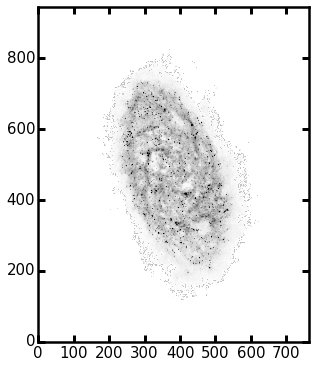

In [57]:
hmap = ism.ISMData()[0]
[x,y,width,height] = ism.GordonSurveyArea()
hmap_Gord = hmap[y:y+height+1, x:x+width+1]
#hmap_Gord = hmap_Gord[np.where(hmap_Gord>0.)]

print hmap.shape
hmap = np.ma.masked_less(hmap, 1.0e20)
print hmap.shape
plt.figure(figsize=(6,6))
hIimgplot = plt.imshow(hmap, cmap='gray_r', origin = 'lower')
hIimgplot.set_clim(1.0e19,8.0e21)
plt.show()

In [63]:
hmap = ism.ISMData()[0]
[x,y,width,height] = ism.GordonSurveyArea()
hmap_Gord = hmap[y:y+height+1, x:x+width+1]
#hmap_Gord = hmap_Gord[np.where(hmap_Gord>0.)]

print hmap.shape
hmap = hmap[np.where(hmap>1.0e18)]
print hmap.shape

print hmap_Gord.size, hmap.size
print 'HI Mass ratio inside G99 area = ', (hmap_Gord.size*1.0*np.sum(hmap_Gord))/(hmap.size*1.0*np.sum(hmap))

(945, 764)
(209600,)
78260 209600
HI Mass ratio inside G99 area =  0.237196946345


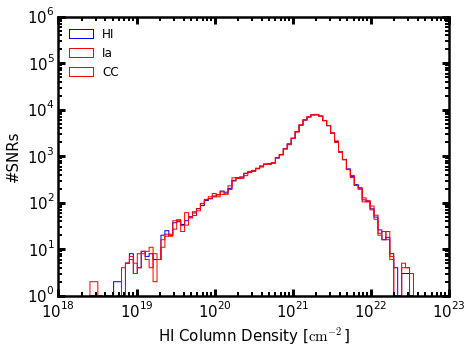

In [8]:
hmap = ism.ISMData()[0]
[x,y,width,height] = ism.GordonSurveyArea()
hmap_Gord = hmap[y:y+height+1, x:x+width+1]

                                                                                                        
h1_1a = np.random.choice(hmap_Gord.flatten(), size=hmap_Gord.size)
h1_cc = np.random.choice(hmap_Gord.flatten(), size=hmap_Gord.size)
#Remove negative values                                                                                                                                   
h1_1a = h1_1a[np.where(h1_1a>0)]
h1_cc = h1_cc[np.where(h1_cc>0)]

plt.figure(figsize=(7,5))
plt.hist(hmap_Gord.flatten(), bins=np.logspace(18,23,100), histtype='step', color='b', label='HI')
plt.hist(h1_1a, bins=np.logspace(18,23,100), histtype='step', color='r', label='Ia')
plt.hist(h1_cc, bins=np.logspace(18,23,100), histtype='step', color = 'r', label='CC')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.0,1.0e6)
plt.legend(loc=2, frameon=False)
plt.xlabel(r'HI Column Density [$\rm{cm^{-2}}$]', fontsize=15)
plt.ylabel(r'#SNRs', fontsize=15)
#plt.savefig('/Users/sumits2k/Desktop/Committee Talk/11232015_Results/HI_PDFs.pdf', dpi=120)
plt.show()

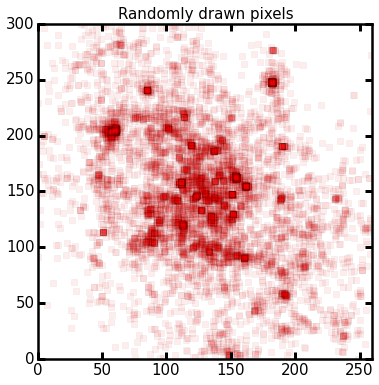

In [6]:


plt.figure(figsize=(6,6))
plt.plot(locx, locy, 'rs', alpha=0.07)
plt.title('Randomly drawn pixels', fontsize=15)
plt.xlim(0,260)
plt.ylim(0,300)

plt.show()

In [54]:
np.savetxt('randompixels_x.txt', locx)
np.savetxt('randompixels_y.txt', locy)

In [56]:
start = tm.time()
locx_cc, locy_cc = ism.ccsn_densities2(size=1000000)
print 'RUNTIME = ',str(dt.timedelta(seconds=tm.time()-start))

RUNTIME =  2:59:19.945803


In [57]:
np.savetxt('randompixels_x.txt', locx_cc)
np.savetxt('randompixels_y.txt', locy_cc)

## Examine the Pixel Library

In [2]:
locx_IA = np.loadtxt('randompixels_x_ia.txt').astype(int)
locy_IA = np.loadtxt('randompixels_y_ia.txt').astype(int)
locx_CC = np.loadtxt('randompixels_x.txt').astype(int)
locy_CC = np.loadtxt('randompixels_y.txt').astype(int)

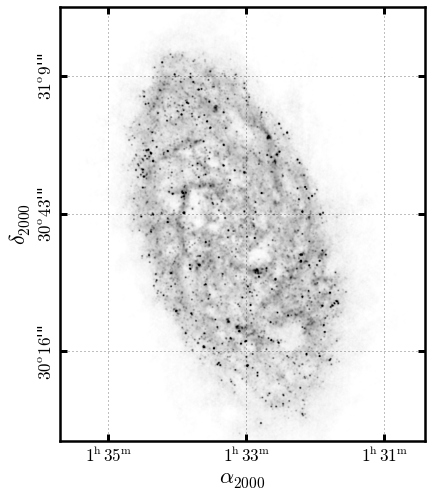

In [17]:
hmap = ism.ISMData()[0]
[x,y,width,height] = ism.GordonSurveyArea()
hmap_Gord = hmap[y:y+height+1, x:x+width+1]
plt.figure(figsize=(7,7))
ax = plt.gca()
#plt.plot(locx_CC[0:200]+x, locy_CC[0:200]+y, 'bx', mew=2.0, ms=8.0, label='Model SNR CC')
#plt.plot(locx_IA[0:200]+x, locy_IA[0:200]+y, 'rx', mew=2.0, ms=8.0, label='Model SNR Ia', alpha=0.6)
hIimgplot = plt.imshow(hmap, cmap='gray_r', origin = 'lower')
hIimgplot.set_clim(1.0e18,9.0e21)
#plt.title('M33, 21 cm [HI] (Braun 2012)', fontsize=15)
plt.legend(numpoints=1, loc=1, fontsize=15)
plt.xlim(130,660)
plt.ylim(170,800)
#plt.legend(loc=1, numpoints=1, fontsize=15)
ax.set_xticks([200,400,600])
ax.set_yticks([300,500,700])
plt.grid()
#ax.grid()
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_yticklabels([r'$\mathrm{30^{o}16}$'+'\''+'\"',\
                     r'$\mathrm{30^{o}43}$'+'\''+'\"',\
                     r'$\mathrm{31^{o}9}$'+'\''+'\"'], rotation='vertical', fontsize=17)
ax.set_xticklabels([r'$\mathrm{1^{h}35^{m}}$', r'$\mathrm{1^{h}33^{m}}$', r'$\mathrm{1^{h}31^{m}}$'], fontsize=17)
plt.xlabel(r'$\alpha_{2000}$',fontsize=22)
plt.ylabel(r'$\delta_{2000}$',fontsize=22)
plt.tight_layout()
plt.savefig('/Users/sumits2k/Desktop/MNRAS/BlankHI.pdf', dpi=200)

plt.show()

In [22]:
[x,y,width,height] = ism.GordonSurveyArea()
print x, y, width, height

254.0 323.0 259.0 300.0


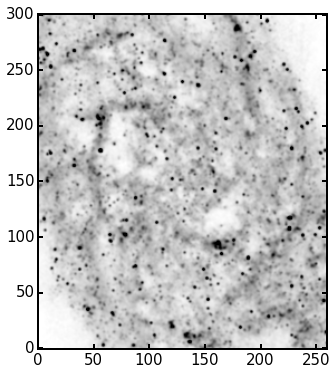

In [3]:
hmap = ism.ISMData()[0]
[x,y,width,height] = ism.GordonSurveyArea()
hmap_Gord = hmap[y:y+height+1, x:x+width+1]

checkMap = True
if checkMap:
    plt.figure(figsize=(6,6))
    hIimgplot = plt.imshow(hmap_Gord, cmap='gray_r', origin = 'lower')
    hIimgplot.set_clim(1.0e19,8.0e21)
    plt.show()


Lets see if numpy choice works

In [307]:
dens_ia = hmap_Gord[locy_IA, locx_IA]
dens_ia_bstrap = np.random.choice(dens_ia, size=500000)
dens_cc = hmap_Gord[locy_CC, locx_CC]

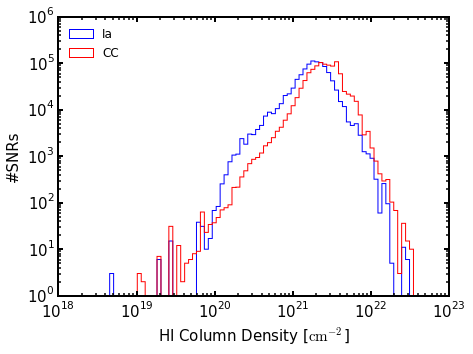

In [311]:
plt.figure(figsize=(7,5))
plt.hist(dens_ia, bins=np.logspace(18,23,100), histtype='step', color='b', label='Ia')
#plt.hist(dens_ia_bstrap, bins=np.logspace(18,23,100), histtype='step', color='r', label='Ia (bstrap)')
plt.hist(dens_cc, bins=np.logspace(18,23,100), histtype='step', color = 'r', label='CC')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.0,1.0e6)
plt.legend(loc=2, frameon=False)
plt.xlabel(r'HI Column Density [$\rm{cm^{-2}}$]', fontsize=15)
plt.ylabel(r'#SNRs', fontsize=15)
plt.savefig('/Users/sumits2k/Desktop/Committee Talk/11232015_Results/HI_PDFs.pdf', dpi=120)
plt.show()

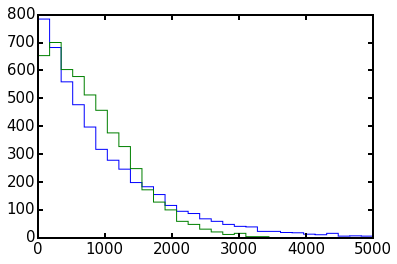

In [76]:
zstar = 1000.0
z = np.random.exponential(scale=zstar, size=10000/2.0)
z2 = np.random.normal(loc=0, scale=zstar, size=10000)
plt.hist(z, bins=np.linspace(0,5000,30), histtype='step')
plt.hist(z2, bins=np.linspace(0,5000,30), histtype='step')
#plt.xlim(0,7000)
plt.show()

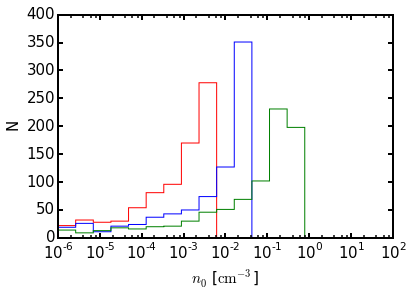

In [121]:
import trumck_nvst_2 as trumck
reload(trumck)
#NH = np.logspace(18,23,1000)
n0_19 = np.zeros(1000)
n0_20 = np.zeros(1000)
n0_21 = np.zeros(1000)
for i in range(1000):
    n0_19[i] = trumck.randomnh(1.0e19,500.0)
    n0_20[i] = trumck.randomnh(1.0e20,500.0)
    n0_21[i] = trumck.randomnh(1.0e21,500.0)
    
plt.hist(n0_19,bins=np.logspace(-6,2,20), color='r', histtype='step')
plt.hist(n0_20,bins=np.logspace(-6,2,20), color='b', histtype='step')
plt.hist(n0_21,bins=np.logspace(-6,2,20), color='g', histtype='step')
plt.xlabel(r'$n_0\ $[$\rm{cm^{-3}}$]', fontsize=15)
plt.ylabel(r'N', fontsize=15)
plt.xscale('log')
#plt.xlim(1.0e-4,10)
plt.show()

In [59]:
import trumck_nvst_2 as trumck
reload(trumck)
z = []
for i in range(10000):
    z.append(trumck.randomnh2(1.0e21, 100))

In [62]:
z

[array([ 12.]),
 array([ 130.]),
 array([ 2786.]),
 array([ 286.]),
 array([ 664.]),
 array([ 248.]),
 array([ 125.]),
 array([ 1504.]),
 array([ 666.]),
 array([ 933.]),
 array([ 726.]),
 array([ 308.]),
 array([ 462.]),
 array([ 453.]),
 array([ 122.]),
 array([ 87.]),
 array([ 165.]),
 array([ 672.]),
 array([ 827.]),
 array([ 100.]),
 array([ 532.]),
 array([ 1231.]),
 array([ 81.]),
 array([ 293.]),
 array([ 238.]),
 array([ 1839.]),
 array([ 120.]),
 array([ 370.]),
 array([ 2194.]),
 array([ 2358.]),
 array([ 1610.]),
 array([ 204.]),
 array([ 129.]),
 array([ 319.]),
 array([ 1820.]),
 array([ 686.]),
 array([ 182.]),
 array([ 1765.]),
 array([ 1779.]),
 array([ 20.]),
 array([ 928.]),
 array([ 337.]),
 array([ 660.]),
 array([ 926.]),
 array([ 1374.]),
 array([ 2029.]),
 array([ 1736.]),
 array([ 2728.]),
 array([ 594.]),
 array([ 305.]),
 array([ 445.]),
 array([ 322.]),
 array([ 366.]),
 array([ 318.]),
 array([ 873.]),
 array([ 57.]),
 array([ 318.]),
 array([ 235.]),
 arra

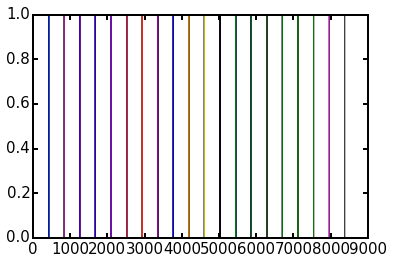

In [61]:
plt.hist(z, bins=20, histtype='step')
plt.show()

In [211]:
zstar = 1000.
z = np.random.laplace(loc=0.0, scale=zstar, size=100000)
znorm = np.random.normal(loc=0.0, scale=zstar, size=100000)
print np.where((np.absolute(z)<=30) & (np.absolute(z)>=0))[0].size*1.0/z.size*1.0
print np.where((np.absolute(znorm)<=30) & (np.absolute(znorm)>=0))[0].size*1.0/znorm.size*1.0

0.02952
0.02404


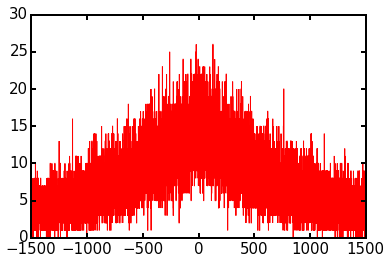

In [215]:
plt.hist(z, bins=np.linspace(-1500,1500,10000), histtype='step', color='r')
#plt.hist(znorm, bins=np.linspace(-1500,1500,10000), histtype='step', color='k')
#plt.xscale('log')
plt.show()

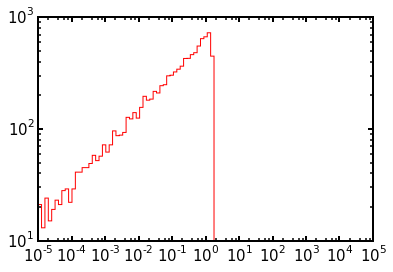

In [294]:
import trumck_nvst_2 as trumck
reload(trumck)
size = 10000
nh_new = np.zeros(size)
nh_old = np.zeros(size)
for i in range(size):
  #  nh_old[i] = trumck.randomnh(1.0e21, 100)
    nh_new[i] = trumck.randomnhwaldo(1.0e21, 100)

plt.hist(nh_new, bins=np.logspace(-5,5,100), histtype='step', color='r')
#plt.hist(nh_old, bins=np.logspace(-21,20,20), histtype='step', color='k')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1.0e-30,1.0e30)
plt.show()    

In [301]:
print np.where(nh_new>1.)[0].size*1.0/nh_new.size

0.1534


In [296]:
np.random.laplace(loc=0., scale=1000., size=1)

array([-191.31782242])